In [1]:
import pandas as pd
import numpy as np
import os

# Change to project root directory to avoid path issues
os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))
print(f"Changed working directory to: {os.getcwd()}")

# Import custom module
from utils.model.model_manager import ModelManager

# Get absolute paths
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "PEPEUSDT_1h_1h-pump05_230520_250302.csv")

# Load historical data
df = pd.read_csv(data_path, parse_dates=['timestamp'])

# Display the first few rows
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2023-05-19 23:00:00,0.000002,0.000002,0.000002,0.000002,1.366782e+12,2012.0,8.728582e+11,1.338515e+06,0,...,NaN,1.767191,0.013072,0.638623,NaN,NaN,NaN,0.277245,NaN,0.655172
1,2023-05-20 00:00:00,0.000002,0.000002,0.000002,0.000002,1.160597e+12,2257.0,3.419778e+11,5.188793e+05,0,...,NaN,0.417749,0.019868,0.294657,NaN,NaN,NaN,-0.410687,NaN,0.689655
2,2023-05-20 01:00:00,0.000002,0.000002,0.000002,0.000002,2.945012e+11,841.0,8.598763e+10,1.298413e+05,0,...,NaN,0.412384,0.006667,0.291977,NaN,NaN,NaN,-0.416046,NaN,0.689655
3,2023-05-20 02:00:00,0.000002,0.000002,0.000002,0.000002,3.724849e+11,1251.0,1.827419e+11,2.766377e+05,0,...,NaN,0.963102,0.013333,0.490602,NaN,NaN,NaN,-0.018796,NaN,0.689655
4,2023-05-20 03:00:00,0.000002,0.000002,0.000002,0.000002,3.364644e+11,1186.0,1.303642e+11,1.971346e+05,0,...,NaN,0.632528,0.013158,0.387453,NaN,NaN,NaN,-0.225094,NaN,0.689655


In [2]:
# Initialize our ModelManager with symbol and date range
symbol = "PEPEUSDT"
start_date = "2023-05-20"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into our ModelManager
manager.load_data(custom_path=data_path)

# Split and prepare data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(           open      high       low     close        volume  num_trades  \
 0      0.000002  0.000002  0.000002  0.000002  1.366782e+12      2012.0   
 1      0.000002  0.000002  0.000002  0.000002  1.160597e+12      2257.0   
 2      0.000002  0.000002  0.000002  0.000002  2.945012e+11       841.0   
 3      0.000002  0.000002  0.000002  0.000002  3.724849e+11      1251.0   
 4      0.000002  0.000002  0.000002  0.000002  3.364644e+11      1186.0   
 ...         ...       ...       ...       ...           ...         ...   
 14924  0.000013  0.000013  0.000013  0.000013  4.994674e+11     18201.0   
 14925  0.000013  0.000013  0.000013  0.000013  6.498068e+11     21691.0   
 14926  0.000013  0.000013  0.000013  0.000013  3.432521e+11     12354.0   
 14927  0.000013  0.000013  0.000013  0.000013  4.211133e+11     14144.0   
 14928  0.000013  0.000013  0.000013  0.000013  1.946603e+11      8695.0   
 
        taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \
 0        8.

In [3]:
# Configure our model with default parameters
manager.configure_model()

# Train the model and evaluate on test set
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.9648


np.float64(0.9648107971657714)

In [4]:
# Get and print model performance metrics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.9648
AUC-ROC Score: 0.9287

Overall Metrics:
Accuracy:  0.7254
Precision: 0.8572
Recall:    0.7254
F1-Score:  0.7400

Class 0 Metrics:
Precision: 0.4961
Recall:    0.9846
F1-Score:  0.6598

Class 1 Metrics:
Precision: 0.9910
Recall:    0.6293
F1-Score:  0.7698

Using raw probabilities
Classification threshold: 0.9648
{'accuracy': 0.7253814147018031, 'precision': 0.8571700903582635, 'recall': 0.7253814147018031, 'f1': 0.740024227785073, 'auc_roc': np.float64(0.9286926001754898), 'optimal_threshold': np.float64(0.9648107971657714), 'precision_0': 0.49612403100775193, 'recall_0': 0.9846153846153847, 'f1_0': 0.6597938144329897, 'precision_1': 0.9910179640718563, 'recall_1': 0.629277566539924, 'f1_1': 0.7697674418604651}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


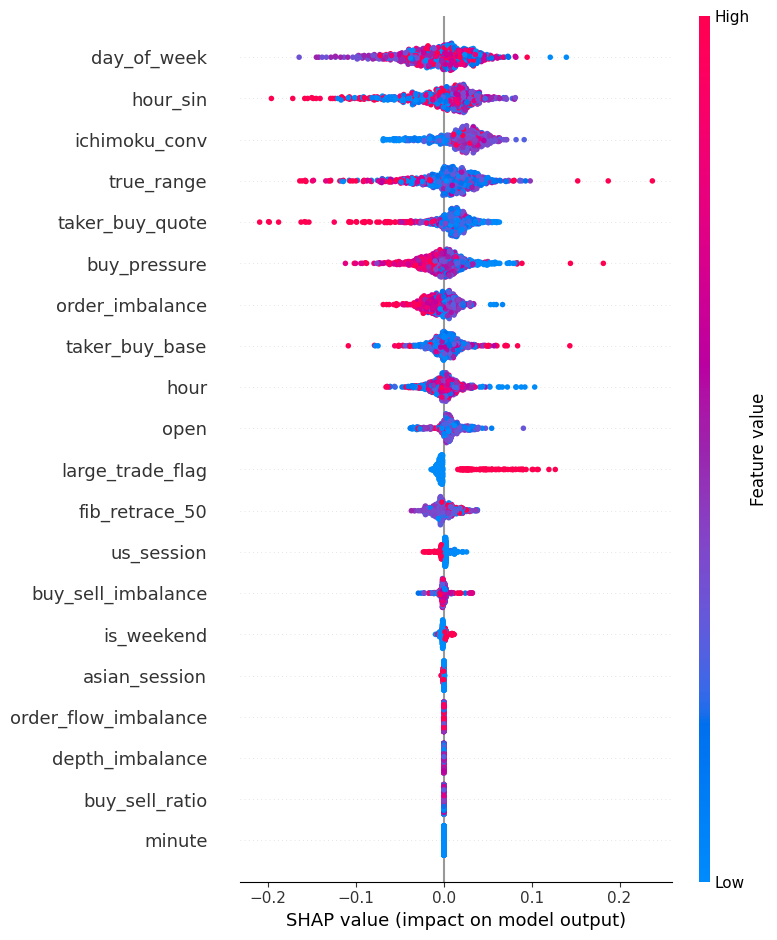


📈 Calculating feature importance...


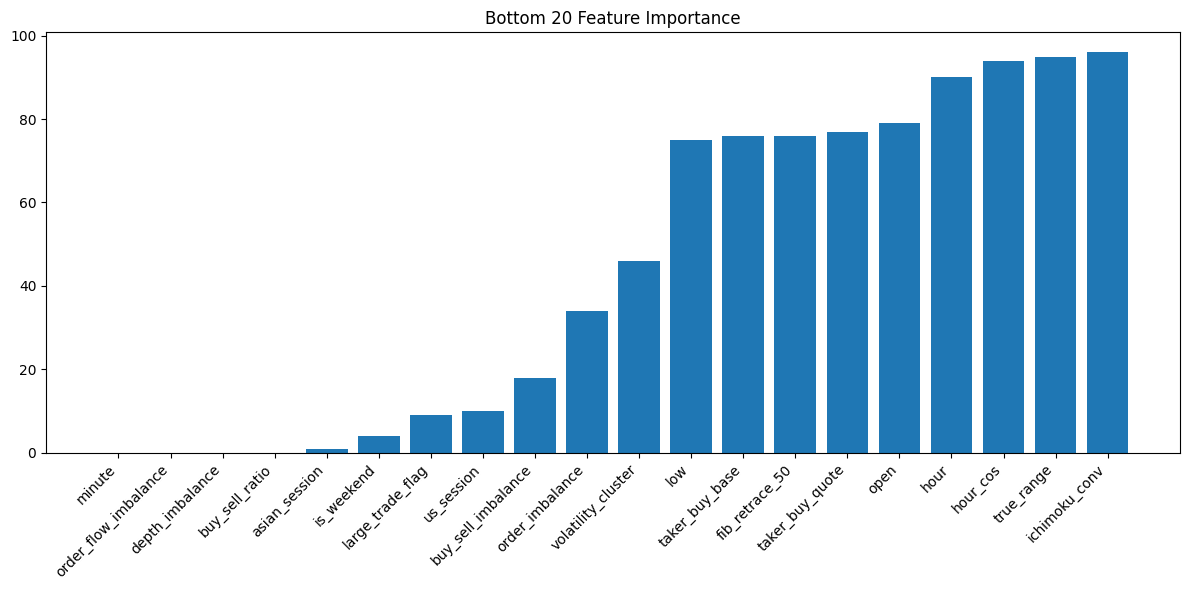

Found existing experiment
Identical result already exists for experiment ID: 6
Logged feature importance for experiment ID: 6


In [5]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1h",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
wf.plot_metrics_over_time()

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="1h",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)